# Exploratory Model Analysis

*Purpose*: **TODO**.


## Setup


In [1]:
import grama as gr
import numpy as np
DF = gr.Intention()
%matplotlib inline

In [2]:
from grama.models import make_prlc_rand
md_circuit = make_prlc_rand()

# Basic Facts


### __qX__ Model summary


In [3]:
# solution-begin
md_circuit 
# solution-end

model: RLC with component tolerances

  inputs:
    var_det:
      R: [0.001, 1.0]
      C: [0.001, 100]
      L: [1e-09, 0.001]

    var_rand:
      dR: (+0) uniform, {'mean': '0.000e+00', 's.d.': '3.000e-02', 'COV': inf, 'skew.': 0.0, 'kurt.': 1.8}
      dL: (+0) uniform, {'mean': '0.000e+00', 's.d.': '6.000e-02', 'COV': inf, 'skew.': 0.0, 'kurt.': 1.8}
      dC: (+0) uniform, {'mean': '3.000e-01', 's.d.': '2.900e-01', 'COV': 0.96, 'skew.': 0.0, 'kurt.': 1.8}

    copula:
      Independence copula

  functions:
      f0: ['R', 'dR', 'L', 'dL', 'C', 'dC'] -> ['Rr', 'Lr', 'Cr']
      f1: ['Lr', 'Cr'] -> ['omega0']
      parallel RLC: ['omega0', 'Rr', 'Cr'] -> ['Q']

*Observations*

<!-- task-begin -->
- ...
  - (Your response here)
<!-- task-end -->


## Model context

The deterministic variables `L, R, C` are the *designed* component values.

The random variables `dL, dR, dC` are *perturbations* to the designed component values.


# Inputs

## Assess input variability


### __qX__ Overview of inputs


eval_sample() is rounding n...
Design runtime estimates unavailable; model has no timing data.
Calling plot_scattermat....


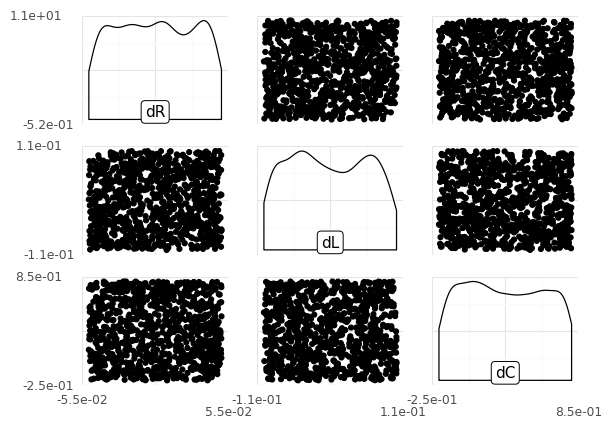

In [4]:
(
    md_circuit
# solution-begin
    >> gr.ev_sample(n=1e3, df_det="nom", skip=True)
    >> gr.pt_auto()
# solution-end
)

*Observations*

<!-- task-begin -->
- ...
  - (Your response here)
<!-- task-end -->


### __qX__ Compare designed and realized values

The following plot shows the designed and realized capacitance values. Inspect the plot, then change to log scales for both the x and y axes. Answer the questions under *observations* below.


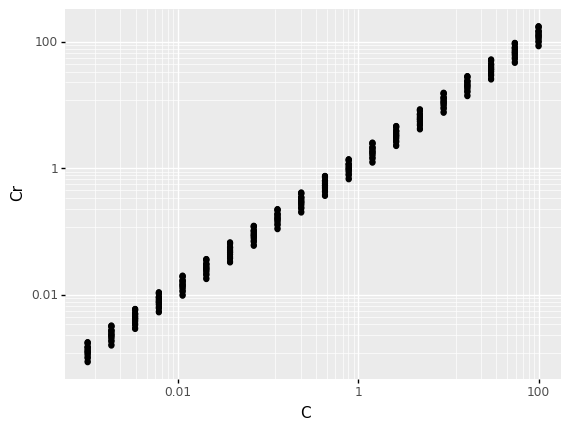

<ggplot: (8768586418622)>

In [5]:
# TASK: Inspect the following plot, change to a log scale
# for both x and y
(
    # NOTE: No need to edit this part of the code
    md_circuit
    >> gr.ev_sample(
        n=20,
        df_det=gr.df_make(
            R=1e-1,
            L=1e-5,
            C=gr.logspace(-3, 2, 20)
        )
    )
    # Visualize
    >> gr.ggplot(gr.aes("C", "Cr"))
    + gr.geom_point()
# task-begin
    # TASK: Add a log scale for x and y
# task-end
# solution-begin
    + gr.scale_x_log10()
    + gr.scale_y_log10()
# solution-end
)

*Observations*

<!-- task-begin -->
- ...
  - (Your response here)
<!-- task-end -->


# Outputs


### __qX__ Overview of outputs


eval_sample() is rounding n...
Calling plot_hists....


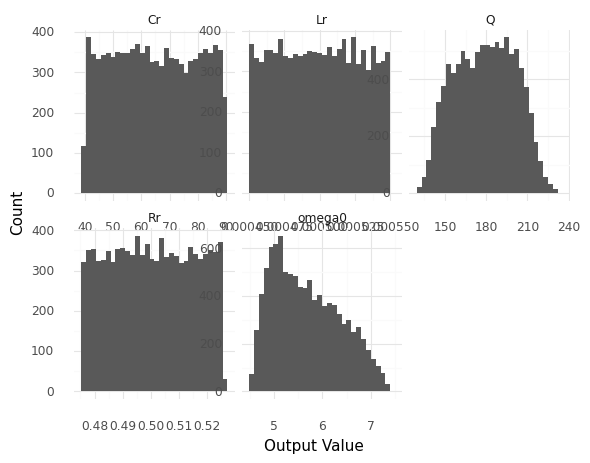

<ggplot: (8768585470727)>

In [6]:
(
    md_circuit
# solution-begin
    >> gr.ev_sample(n=1e4, df_det="nom")
    >> gr.pt_auto()
# solution-end
)

*Observations*

*Note*: If you can't reliably make out the shapes of the distributions, try increasing `n`.

<!-- task-begin -->
- What distribution shapes do the realized component values `Lr, Rr, Cr` have?
  - (Your response here)
- What distribution shape does the output `Q` have?
  - (Your response here)
- What distribution shape does the output `omega0` have?
  - (Your response here)
<!-- task-end -->
<!-- solution-begin -->
- What distribution shapes do the realized component values `Lr, Rr, Cr` have?
  - These are all uniform distributions
- What distribution shape does the output `Q` have?
  - This distribution is a bit bell-shaped, but it has a much flatter top and narrower tails than a gaussian.
- What distribution shape does the output `omega0` have?
  - This distribution is strongly asymmetric, with a longer right tail (right skew).
<!-- solution-end -->


### __qX__ Scatter of outputs


eval_sample() is rounding n...


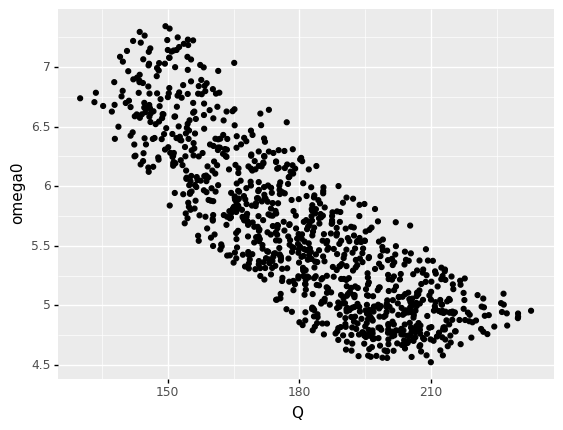

<ggplot: (8768585673343)>

In [7]:
(
    md_circuit
    >> gr.ev_sample(n=1e3, df_det="nom")
# solution-begin
    >> gr.ggplot(gr.aes("Q", "omega0"))
    + gr.geom_point()
# solution-end
)


*Observations*

<!-- task-begin -->
- ...
  - (Your response here)
<!-- task-end -->


### __qX__ Density of outputs

Visualize `Q` and `omega0` with a 2d bin plot. Increase the sample size `n` to get a "full" plot.


eval_sample() is rounding n...


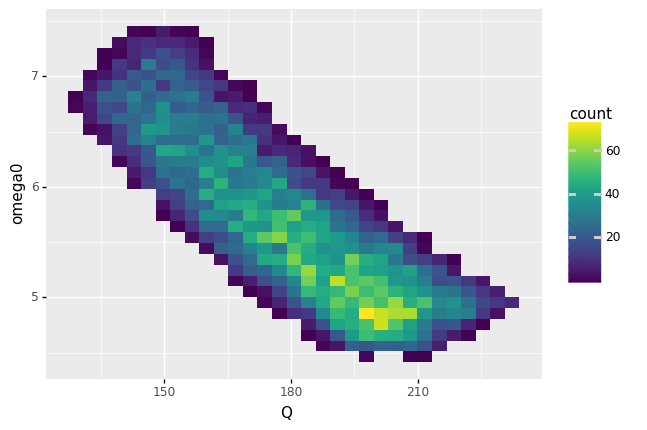

<ggplot: (8768585551613)>

In [8]:
(
    md_circuit
# solution-begin
    >> gr.ev_sample(n=1e4, df_det="nom")
    >> gr.ggplot(gr.aes("Q", "omega0"))
    + gr.geom_bin2d()
# solution-end
)

*Observations*

<!-- task-begin -->
- Briefly describe the distribution of realized performance (values of `Q` and `omega0`).
  - (Your response here)
<!-- task-end -->
<!-- solution-begin -->
- Briefly describe the distribution of realized performance (values of `Q` and `omega0`).
  - The distribution is oddly rectangular, with fairly "sharp" square sides. The distribution seems to end abruptly; there are exactly zero counts outside the "curved rectangle". The values of `Q` and `omega0` are negatively correlated; when `Q` is larger `omega0` tends to be smaller. The distribution is also asymmetric; note that highest `count` (brightest fill color) is *not* in the center, but rather towards the bottom-right.
<!-- solution-end -->


### __qX__ Compare nominal with distribution


eval_sample() is rounding n...


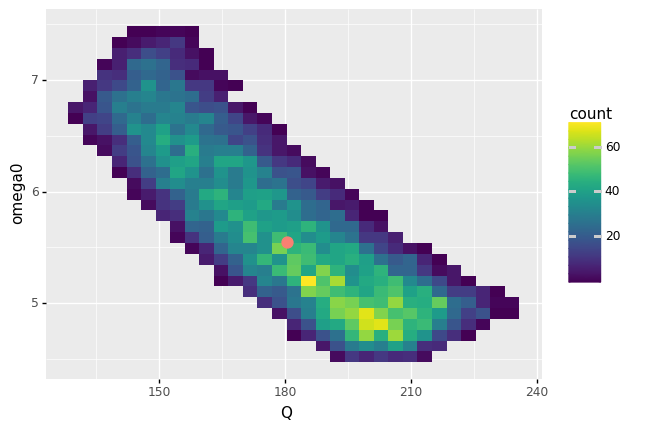

<ggplot: (8768607507023)>

In [9]:
(
    md_circuit
    >> gr.ev_sample(n=1e4, df_det="nom")
    
    >> gr.ggplot(gr.aes("Q", "omega0"))
    + gr.geom_bin2d()
    + gr.geom_point(
# task-begin
        # Use the `data` argument to add a geometry for
        # the output value associated with nominal input values
# task-end
# solution-begin
        data=md_circuit
        >> gr.ev_nominal(df_det="nom"),
# solution-end
        color="salmon",
        size=4,
    )
)

*Observations*

The nominal design (red point) represents the predicted performance if we assume the nominal circuit component values. 

<!-- task-begin -->
- How does the distribution of real circuit performance (values of `Q`, `omega0`) compare with the nominal performance?
  - (Your response here)
- Is the most likely performance (values of `Q`, `omega0`) the same as the nominal performance? ("Most likely" is where `count` is the largest.)
  - (Your response here)
- Assume that another system depends on the particular values of `Q` and `omega0` provided by this system. Would it be safe to assume the performance is within 1% of the nominal performance?
  - (Your response here)
<!-- task-end -->
<!-- solution-begin -->
- How does the distribution of real circuit performance (values of `Q`, `omega0`) compare with the nominal performance?
  - The distribution of real performance is quite large, and not at all symmetric about the nominal performance. The values `Q` and `omega0` exhibit negative correlation: when `Q` is larger `omega0` tends to be smaller.
- Is the most likely performance (values of `Q`, `omega0`) the same as the nominal performance? ("Most likely" is where `count` is the largest.)
  - No; the most likely performance is at a larger value of `Q` and smaller value of `omega0`.
- Assume that another system depends on the particular values of `Q` and `omega0` provided by this system. Would it be safe to assume the performance is within 1% of the nominal performance?
  - No; we see variability in `Q` and `omega0` far greater than 1%!
<!-- solution-end -->


# Input-to-output Relationships


### __qX__ Sinew plot


Calling plot_sinew_outputs....


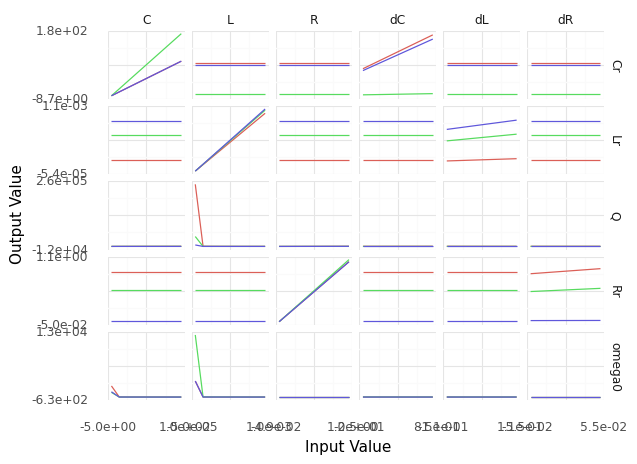

<ggplot: (8768607006148)>

In [10]:
(
    md_circuit
# solution-begin
    >> gr.ev_sinews(df_det="swp")
    >> gr.pt_auto()
# solution-end
)

*Observations*

<!-- task-begin -->
- ...
  - (Your response here)
<!-- task-end -->
